In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Glidarc_Plasma_Reactor.csv')
print(df)
print("\n The shape of df is:", df.shape)

      Time  Length_40  Length_60  Length_80  Length_100
0   0.0001     0.0020     0.0020     0.0020      0.0020
1   0.0010     0.0237     0.0022     0.0041      0.0097
2   0.0020     0.0282     0.0084     0.0101      0.0162
3   0.0030     0.0306     0.0413     0.0186      0.0064
4   0.0040     0.0331     0.0133     0.0026      0.0181
5   0.0050     0.0216     0.0033     0.0276      0.0138
6   0.0060     0.0124     0.0076     0.0074      0.0117
7   0.0070     0.0018     0.0205     0.0188      0.0028
8   0.0080     0.0041     0.0296     0.0150      0.0045
9   0.0090     0.0315     0.0499     0.0167      0.0081
10  0.0100     0.0334     0.0057     0.0136      0.0119
11  0.0110     0.0415     0.0080     0.0242      0.0088
12  0.0120     0.0279     0.0031     0.0144      0.0025
13  0.0130     0.0280     0.0057     0.0206      0.0343
14  0.0140     0.0096     0.0048     0.0285      0.0291
15  0.0150     0.0031     0.0283     0.0157      0.0297
16  0.0160     0.0110     0.0465     0.0149     

In [3]:
time0 = tf.convert_to_tensor(df.Time.values)
with tf.Session() as sess:
    print(sess.run(time0))

[0.0001 0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02  ]


In [4]:
length = tf.convert_to_tensor(df.iloc[:, 1:5])
with tf.Session() as sess:
    print(sess.run(length))

[[0.002  0.002  0.002  0.002 ]
 [0.0237 0.0022 0.0041 0.0097]
 [0.0282 0.0084 0.0101 0.0162]
 [0.0306 0.0413 0.0186 0.0064]
 [0.0331 0.0133 0.0026 0.0181]
 [0.0216 0.0033 0.0276 0.0138]
 [0.0124 0.0076 0.0074 0.0117]
 [0.0018 0.0205 0.0188 0.0028]
 [0.0041 0.0296 0.015  0.0045]
 [0.0315 0.0499 0.0167 0.0081]
 [0.0334 0.0057 0.0136 0.0119]
 [0.0415 0.008  0.0242 0.0088]
 [0.0279 0.0031 0.0144 0.0025]
 [0.028  0.0057 0.0206 0.0343]
 [0.0096 0.0048 0.0285 0.0291]
 [0.0031 0.0283 0.0157 0.0297]
 [0.011  0.0465 0.0149 0.0094]
 [0.0327 0.0091 0.0147 0.0045]
 [0.0132 0.0238 0.0407 0.0221]
 [0.0248 0.0053 0.0105 0.0126]
 [0.0321 0.0081 0.0176 0.0267]]


In [5]:
# Calculating the velocity of the gliding arc.
time = time0[:, tf.newaxis]
vel = tf.realdiv(length, time)
with tf.Session() as sess:
    print("The velocities of the gliding arc at flowrate of 40L/min, 60L/min, 800L/min, 100L/min are: \n" )
    print(sess.run(vel))

The velocities of the gliding arc at flowrate of 40L/min, 60L/min, 800L/min, 100L/min are: 

[[20.         20.         20.         20.        ]
 [23.7         2.2         4.1         9.7       ]
 [14.1         4.2         5.05        8.1       ]
 [10.2        13.76666667  6.2         2.13333333]
 [ 8.275       3.325       0.65        4.525     ]
 [ 4.32        0.66        5.52        2.76      ]
 [ 2.06666667  1.26666667  1.23333333  1.95      ]
 [ 0.25714286  2.92857143  2.68571429  0.4       ]
 [ 0.5125      3.7         1.875       0.5625    ]
 [ 3.5         5.54444444  1.85555556  0.9       ]
 [ 3.34        0.57        1.36        1.19      ]
 [ 3.77272727  0.72727273  2.2         0.8       ]
 [ 2.325       0.25833333  1.2         0.20833333]
 [ 2.15384615  0.43846154  1.58461538  2.63846154]
 [ 0.68571429  0.34285714  2.03571429  2.07857143]
 [ 0.20666667  1.88666667  1.04666667  1.98      ]
 [ 0.6875      2.90625     0.93125     0.5875    ]
 [ 1.92352941  0.53529412  0.86470588  0

In [6]:
print(vel.shape)
print(vel.dtype)
print(type(vel))

(21, 4)
<dtype: 'float64'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [7]:
# Converting the Tensor to numpy array.
sess = tf.Session()
with sess.as_default():
    vel1 = vel.eval()
    print(vel1)

[[20.         20.         20.         20.        ]
 [23.7         2.2         4.1         9.7       ]
 [14.1         4.2         5.05        8.1       ]
 [10.2        13.76666667  6.2         2.13333333]
 [ 8.275       3.325       0.65        4.525     ]
 [ 4.32        0.66        5.52        2.76      ]
 [ 2.06666667  1.26666667  1.23333333  1.95      ]
 [ 0.25714286  2.92857143  2.68571429  0.4       ]
 [ 0.5125      3.7         1.875       0.5625    ]
 [ 3.5         5.54444444  1.85555556  0.9       ]
 [ 3.34        0.57        1.36        1.19      ]
 [ 3.77272727  0.72727273  2.2         0.8       ]
 [ 2.325       0.25833333  1.2         0.20833333]
 [ 2.15384615  0.43846154  1.58461538  2.63846154]
 [ 0.68571429  0.34285714  2.03571429  2.07857143]
 [ 0.20666667  1.88666667  1.04666667  1.98      ]
 [ 0.6875      2.90625     0.93125     0.5875    ]
 [ 1.92352941  0.53529412  0.86470588  0.26470588]
 [ 0.73333333  1.32222222  2.26111111  1.22777778]
 [ 1.30526316  0.27894737  0.55

In [8]:
# Converting the numpy array to pandas dataframe and labeling the columns.
df1 = pd.DataFrame(vel1, columns = ['vel_40','vel_60','vel_80','vel_100'])
df1

,vel_40,vel_60,vel_80,vel_100
0,20.000000,20.000000,20.000000,20.000000
1,23.700000,2.200000,4.100000,9.700000
2,14.100000,4.200000,5.050000,8.100000
3,10.200000,13.766667,6.200000,2.133333
4,8.275000,3.325000,0.650000,4.525000
5,4.320000,0.660000,5.520000,2.760000
6,2.066667,1.266667,1.233333,1.950000
7,0.257143,2.928571,2.685714,0.400000
8,0.512500,3.700000,1.875000,0.562500
9,3.500000,5.544444,1.855556,0.900000


In [9]:
# Concatenating the dataframes.
df2 = pd.concat([df, df1], axis = 1)
df2

,Time,Length_40,Length_60,Length_80,Length_100,vel_40,vel_60,vel_80,vel_100
0,0.0001,0.0020,0.0020,0.0020,0.0020,20.000000,20.000000,20.000000,20.000000
1,0.0010,0.0237,0.0022,0.0041,0.0097,23.700000,2.200000,4.100000,9.700000
2,0.0020,0.0282,0.0084,0.0101,0.0162,14.100000,4.200000,5.050000,8.100000
3,0.0030,0.0306,0.0413,0.0186,0.0064,10.200000,13.766667,6.200000,2.133333
4,0.0040,0.0331,0.0133,0.0026,0.0181,8.275000,3.325000,0.650000,4.525000
5,0.0050,0.0216,0.0033,0.0276,0.0138,4.320000,0.660000,5.520000,2.760000
6,0.0060,0.0124,0.0076,0.0074,0.0117,2.066667,1.266667,1.233333,1.950000
7,0.0070,0.0018,0.0205,0.0188,0.0028,0.257143,2.928571,2.685714,0.400000
8,0.0080,0.0041,0.0296,0.0150,0.0045,0.512500,3.700000,1.875000,0.562500
9,0.0090,0.0315,0.0499,0.0167,0.0081,3.500000,5.544444,1.855556,0.900000


In [10]:
# Summary of the statistics of the data.

summary = df2.describe()
summary

,Time,Length_40,Length_60,Length_80,Length_100,vel_40,vel_60,vel_80,vel_100
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.010005,0.021252,0.015548,0.016110,0.013567,5.031900,3.202984,3.051728,3.047826
std,0.006197,0.012354,0.015180,0.009152,0.009707,6.639821,4.889662,4.215756,4.603291
min,0.000100,0.001800,0.002000,0.002000,0.002000,0.206667,0.258333,0.552632,0.208333
25%,0.005000,0.011000,0.005300,0.010500,0.006400,0.733333,0.535294,1.046667,0.663158
50%,0.010000,0.024800,0.008100,0.015000,0.011700,2.153846,1.322222,1.855556,1.335000
75%,0.015000,0.031500,0.023800,0.018800,0.018100,4.320000,3.325000,2.685714,2.638462
max,0.020000,0.041500,0.049900,0.040700,0.034300,23.700000,20.000000,20.000000,20.000000


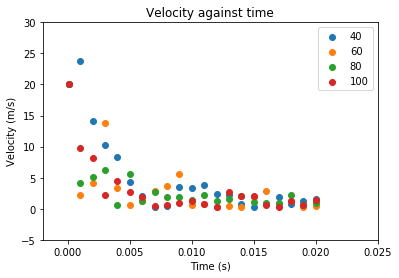

In [11]:
# Plotting the velocities against time.
plt.figure()
plt.scatter(df2.Time, df2.vel_40 , label = '40')
plt.scatter(df2.Time, df2.vel_60, label = '60')
plt.scatter(df2.Time, df2.vel_80 , label = '80')
plt.scatter(df2.Time, df2.vel_100, label = '100')
plt.title('Velocity against time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.ylim(-5, 30)
plt.xlim(-0.002,0.025)
plt.show()

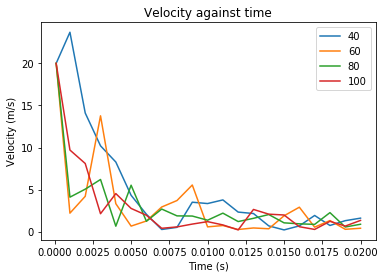

In [12]:
plt.plot(df2.Time, df2.vel_40 , label = '40')
plt.plot(df2.Time, df2.vel_60, label = '60')
plt.plot(df2.Time, df2.vel_80 , label = '80')
plt.plot(df2.Time, df2.vel_100, label = '100')
plt.title('Velocity against time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.show()

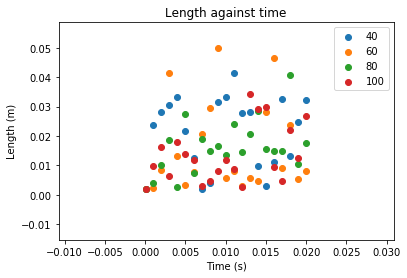

In [13]:
# Plotting the length against time.
plt.scatter(df2.Time, df2.Length_40 , label = '40')
plt.scatter(df2.Time, df2.Length_60, label = '60')
plt.scatter(df2.Time, df2.Length_80 , label = '80')
plt.scatter(df2.Time, df2.Length_100, label = '100')
plt.title('Length against time')
plt.xlabel('Time (s)')
plt.ylabel('Length (m)')
plt.legend()
plt.show()

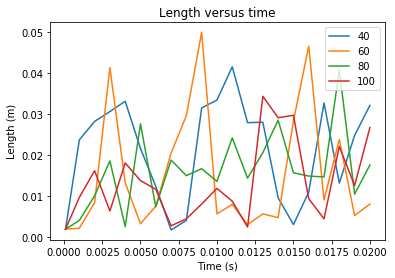

In [14]:
plt.plot(df2.Time, df2.Length_40 , label = '40')
plt.plot(df2.Time, df2.Length_60, label = '60')
plt.plot(df2.Time, df2.Length_80 , label = '80')
plt.plot(df2.Time, df2.Length_100, label = '100')
plt.title('Length versus time')
plt.xlabel('Time (s)')
plt.ylabel('Length (m)')
plt.legend()
plt.show()